# 1. Preliminaries

In [3]:
#!pip3 install qutip
import numpy as np
import qutip as qp
import scipy as si
import pandas as pd
from random import random, choice, randint

     |████████████████████████████████| 3.5MB 2.7MB/s 
  Created wheel for qutip: filename=qutip-4.5.0-cp36-cp36m-linux_x86_64.whl size=12883343 sha256=9b76a74d75b72a21e38d1f3e6a12a27d2f27467e02f0522664fa5e51decb4237
  Stored in directory: /root/.cache/pip/wheels/c9/85/e8/3fbad9a0816141b4c5f1d73d8a880ed91265fea84192cbe37b
Successfully built qutip


# 2. Gell_Mann matrix generator function

this function will generate the gellmann matrix of dimension d.

the function "gellmann(j,k,d)" will generate the jth_kth gellmann matrix of dimension d. so for every d dimension we have d^2 gellmann matrix. one of them is I, so the number of gellmann matrix that is not trivial is (d^2 - 1).

In [0]:
"""Generate generalized Gell-Mann matrices.
  .. module:: gellmann.py
     :synopsis: Generate generalized Gell-Mann matrices
  .. moduleauthor:: Jonathan Gross <jarthurgross@gmail.com>
"""
from itertools import product

def gellmann(j, k, d):
    r"""Returns a generalized Gell-Mann matrix of dimension d.
    
    According to the convention in *Bloch Vectors for Qubits* by Bertlmann and
    Krammer (2008), returns :math:`\Lambda^j` for :math:`1\leq j=k\leq d-1`,
    :math:`\Lambda^{kj}_s` for :math:`1\leq k<j\leq d`, :math:`\Lambda^{jk}_a`
    for :math:`1\leq j<k\leq d`, and :math:`I` for :math:`j=k=d`.
    Parameters
    ----------
    j : positive integer
        Index for generalized Gell-Mann matrix
    k : positive integer
        Index for generalized Gell-Mann matrix
    d : positive integer
        Dimension of the generalized Gell-Mann matrix
    Returns
    -------
    numpy.array
        A genereralized Gell-Mann matrix.
    """

    if j > k:
        gjkd = np.zeros((d, d), dtype=np.complex128)
        gjkd[j - 1][k - 1] = 1
        gjkd[k - 1][j - 1] = 1
    elif k > j:
        gjkd = np.zeros((d, d), dtype=np.complex128)
        gjkd[j - 1][k - 1] = -1.j
        gjkd[k - 1][j - 1] = 1.j
    elif j == k and j < d:
        gjkd = np.sqrt(2/(j*(j + 1)))*np.diag([1 + 0.j if n <= j
                                               else (-j + 0.j if n == (j + 1)
                                                     else 0 + 0.j)
                                               for n in range(1, d + 1)])
    else:
        gjkd = np.diag([1 + 0.j for n in range(1, d + 1)])

    return gjkd

def get_basis(d):
    r"""Return a basis of operators.
    
    The basis is made up of orthogonal Hermitian operators on a Hilbert space
    of dimension d, with the identity element in the last place.
    Parameters
    ----------
    d : int
        The dimension of the Hilbert space.
    Returns
    -------
    list of numpy.array
        The basis of operators.
    """
    return [gellmann(j, k, d) for j, k in product(range(1, d + 1), repeat=2)]

in this cell the gellmann matrix of 3 dimension will generate and they will save in a dictionary and labeled them by numbers 0,1,...,8 .

In [0]:
def gellmann3():
    gellmann3_basis = {}

    k=0
    for i in range(1,4):
        for j in range(1,4):
            gellmann3_basis.update({"G{}".format(k):gellmann(i,j,3)})
            k+=1
        
    return gellmann3_basis

# 3. Coefficients of gellmann's expansion

at this cell a random density matrix will generate by qutip library.

for calculating the coefficients of gellmann expansion we do this iteration:
1. calculate the tensor product of gellmann matrices for every coefficient
2. calculate the dot product of "ro" and the "gellmann's tensor product"
3. calculate the trace of this matrix and divide it into 4
4. append it to our index list

In [0]:
def coef_of_gellmann(ro):

    coef = {}  ## the coefficient's dictionary (suitable format for saving as a data)
    gellmann3_basis = gellmann3() ## the gellmann matrix for a 3 dimension system
    
    for i in range(9):
        for j in range(9):
            tensorP = np.kron(gellmann3_basis["G{}".format(i)],gellmann3_basis["G{}".format(j)]) ## Tensor product of gelllmann matrices
            c = np.trace(np.dot(ro,tensorP))/4   ## dot product and trace
            c = c.real       ## all of gellmann coefs is a real
            c = round(c,8)  
            coef.update({"a{}{}".format(i,j):c})  ## update the coef dict by a[i][j] and its gellmann coef for g[i][j]

    index = np.array(coef)  ## change list to np.array() object
    return coef

this cell is just a test of this algotithm in 3 dimension bipatite systems.

In [7]:
N = 3

ro = qp.rand_dm(N*N,0.5,dims=[[N,N], [N,N]])
coef_of_gellmann(ro)

{'a00': -0.04914896,
 'a01': 0.01357373,
 'a02': 0.00766115,
 'a03': -0.01901964,
 'a04': 0.02516087,
 'a05': 0.02998401,
 'a06': -0.00054281,
 'a07': 0.02259852,
 'a08': -0.0210048,
 'a10': -0.01169597,
 'a11': 0.02918889,
 'a12': 0.00217249,
 'a13': -0.01968003,
 'a14': 0.03604363,
 'a15': -0.01759745,
 'a16': -0.0180548,
 'a17': -0.03245923,
 'a18': -0.0327365,
 'a20': -0.00852363,
 'a21': 0.02037124,
 'a22': 0.00167872,
 'a23': -0.00399047,
 'a24': 0.01183138,
 'a25': -0.00057586,
 'a26': 0.00873533,
 'a27': -0.00305307,
 'a28': 0.00486101,
 'a30': -0.00275585,
 'a31': 0.00521655,
 'a32': -0.00049599,
 'a33': 0.00131111,
 'a34': 0.02650374,
 'a35': -0.03761394,
 'a36': -0.00864954,
 'a37': 0.01638592,
 'a38': -0.02984083,
 'a40': -0.00633071,
 'a41': 0.00421507,
 'a42': 0.00108532,
 'a43': 0.02316075,
 'a44': -0.0098608,
 'a45': -0.01685222,
 'a46': 0.00356703,
 'a47': 0.00538602,
 'a48': 0.00387056,
 'a50': 0.00067719,
 'a51': -0.04166056,
 'a52': -0.02557958,
 'a53': -0.01048117,

# 4. Generate entangled states (PPT)

In this cell we define a PPT funcion that check positive partial transpose.

In [0]:
def PPT(ro):
    """ positive partial transpose 
    input : density matrix
    out put:list of  coefficient of gellmann matrices and detect entangeled states
    """

    ro_pt = qp.partial_transpose(ro,[0,1])  ## partial transpose in subsystem 2
    eig = ro_pt.eigenstates()   ## calculate the eigenvalues and eigenstates
    eigv = [round(i,8) for i in eig[0]] 
    
    result = coef_of_gellmann(ro)
    
    if (eigv[0]<0 ):
            result.update({"label":1})  ## the entangled states that labeled by 1
            return result
    else :
            result.update({"label":2})  ## the unknown states that labeled by 2
            return result


# 5. Generate separable states (Convex combination)

in this cell we define two function that:
1. Convex_Combination: this function is give a matrix list and return a convex combination of this matrices
2. generate_ran_den_list: this function is generate a list of random density matrices

In [0]:
def Convex_Combination(matrix_list, index=10):
    
    coef = np.random.dirichlet(np.ones(index),size=1)   ## generating list of numbers that is positive and its sum is 1 with length equal to 'index'
    
    seprable_state = qp.Qobj()    ## build an empty Qobj for cycle
    for i in range(index):
        a = choice(matrix_list)   ## choice a density matrix randomly
        b = choice(matrix_list)   ## choice a density matrix randomly
        
        tensorP = np.kron(a,b) ## Tensor product of density matrices
        tensorP *= round(coef[0][i],9)  ## product of tensorP and a coef that come from the coef list
        
        seprable_state += tensorP  ## at the last its a convex combination of tensor product of density matrices
    
    return seprable_state


def generate_ran_den_list(dim, index= 100):
    
    result = []
    for i in range(int(index)):
        density = round(random(),4)     ## for build a random number between 0 and 1

        rand = qp.rand_dm(dim, density)   ## generate a random density matrix with dimension N
        result.append(rand)        ## appending this random density matrix to ran_den_mat list    
    
    return result

# 6. Generate data

in this cell we build 100 000 random states and labeled that. after that we build a data frame for saving and using in future.

In [14]:
%%time

states={} #states
dim = 3   ## dimension of a system
R = 10000  #the number of entangeled states
##generate the entangled states
for i in range (1,R+1):
    density = round(random(),4)     ## for build a random number between 0 and 1
    
    ro = qp.rand_dm(N*N, density, dims=[[N,N], [N,N]])     #generating random density matrix with a random density
    states.update({"{}".format(i):PPT(ro)})     # update the states by its number and label and gellmann coefs


##generate the separable states
ran_den_mat = generate_ran_den_list(dim, R/2) ## a list of random density matrix for a system

for i in range(R+1,2*R+1):
    index = randint(10,100)   ## build a number between 10 and 100 for using in function
    sep = Convex_Combination(ran_den_mat, index)  ## generate a random seprable density matrix
    
    sep_coef = coef_of_gellmann(sep)   ## calculate the gellmann coefs
    sep_coef.update({"label":0})   ## labeled seprable states by 0
    
    states.update({"{}".format(i):sep_coef})  ## update sep_states
    
    
df = pd.DataFrame(data=states).T  # build a data frame by pandas


CPU times: user 7min 59s, sys: 700 ms, total: 8min
Wall time: 8min


In [17]:
df

,a00,a01,a02,a03,a04,a05,a06,a07,a08,a10,a11,a12,a13,a14,a15,a16,a17,a18,a20,a21,a22,a23,a24,a25,a26,a27,a28,a30,a31,a32,a33,a34,a35,a36,a37,a38,a40,a41,a42,a43,...,a46,a47,a48,a50,a51,a52,a53,a54,a55,a56,a57,a58,a60,a61,a62,a63,a64,a65,a66,a67,a68,a70,a71,a72,a73,a74,a75,a76,a77,a78,a80,a81,a82,a83,a84,a85,a86,a87,a88,label
1,0.052404,0.000000,0.000000,0.000000,-0.016828,-0.024774,0.000000,-0.007199,0.059047,0.019365,0.000000,0.000000,0.000000,0.011180,-0.043900,0.000000,0.023187,0.019365,-0.017291,0.014660,0.000000,-0.026964,0.009983,0.000000,0.000000,0.000000,0.017291,0.000208,0.000000,0.000000,0.000000,0.000120,-0.023187,0.000000,-0.043900,0.000208,0.034126,0.000000,0.000000,0.000000,...,0.000000,0.004157,0.019836,0.000000,0.020915,-0.018618,-0.023158,0.000000,0.000000,-0.030135,0.000000,0.000000,0.046521,-0.026964,0.000000,-0.014660,-0.026859,0.000000,0.000000,0.000000,-0.046521,0.000000,0.023158,0.030135,0.020915,0.000000,0.000000,-0.018618,0.000000,0.000000,-0.028000,0.000000,0.000000,0.000000,0.020512,0.024774,0.000000,0.007199,0.25,1.0
2,0.108497,-0.037052,0.000000,0.049804,-0.072169,0.000000,0.000000,0.000000,-0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.206979,0.021392,0.000000,-0.028755,...,0.000000,0.000000,-0.072169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016503,0.037052,0.000000,-0.049804,0.144338,0.000000,0.000000,0.000000,0.25,2.0
3,0.006283,0.008551,0.013081,-0.044377,-0.031247,0.006370,0.004780,-0.026665,0.004928,-0.001771,0.023236,-0.003429,-0.001376,-0.025219,-0.012660,-0.002275,0.040047,0.019545,0.005159,0.016401,-0.010448,-0.003926,-0.013527,-0.020298,0.001278,0.007662,0.000180,-0.003014,-0.014908,-0.001850,-0.005362,0.014583,-0.046690,0.011519,-0.024338,0.001788,-0.010303,-0.031993,0.007533,0.001779,...,0.006233,0.024694,0.026678,-0.024458,0.007673,0.011527,-0.008896,0.030207,0.001994,-0.007164,-0.013488,0.010528,-0.005968,-0.003267,-0.030634,0.002485,-0.032303,0.008902,0.021463,-0.025943,0.024892,-0.002172,-0.000679,0.026051,0.030485,-0.003375,-0.019445,0.003973,-0.007616,0.006181,-0.006745,-0.015999,0.013047,-0.026655,-0.017311,0.003337,0.010797,0.004741,0.25,1.0
4,0.011074,0.000000,0.000000,0.000000,0.112369,0.000000,0.000000,0.000000,-0.113926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.137944,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.052988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102851,0.000000,0.000000,0.000000,-0.072169,0.000000,0.000000,0.000000,0.25,2.0
5,-0.009471,-0.012386,0.013625,-0.002871,0.015021,-0.037794,-0.021952,-0.015996,0.003438,0.013365,0.016379,0.000409,-0.021728,0.036950,-0.012943,0.002767,0.016800,0.002937,0.001235,-0.022691,0.011516,0.018454,-0.011181,0.009531,0.011497,0.002544,-0.005600,-0.015446,0.011504,0.029036,0.023057,0.036704,0.013584,0.008007,-0.042742,-0.026720,0.001353,-0.014892,0.003567,0.007529,...,-0.007309,0.019612,0.000974,0.029968,-0.015591,-0.004454,-0.012455,-0.004760,0.003331,0.014396,-0.016696,0.002408,0.001405,-0.012937,0.005642,0.013723,-0.048566,0.012275,-0.001966,-0.030970,-0.012655,0.008931,-0.018946,-0.023275,0.018233,-0.004926,0.016826,-0.006830,-0.035302,-0.024858,-0.021465,0.004960,0.024046,-0.002956,-0.011243,-0.016394,-0.015233,0.

in this cell we save our data frame as a zip file

In [0]:
df.to_csv('data_of_states.csv.zip')
##df.to_csv('data_of_states.csv')

# 7. correlation of data

the plot shows the correlation of 20000 random states

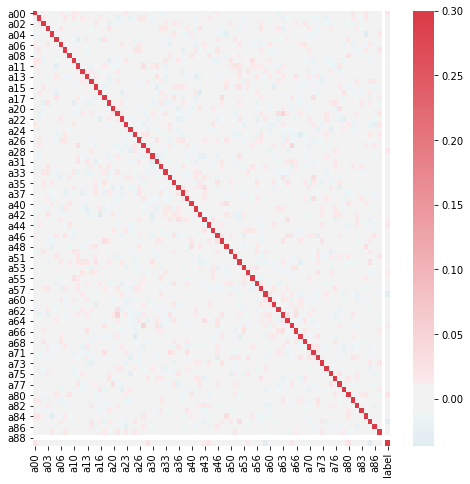

In [16]:
import matplotlib.pyplot as plt
import seaborn
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#data_mini = d.sample(10000)
seaborn.heatmap(corr, cmap=cmap, vmax=.3, center=0)
plt.show()